# CodeLab 3: Classifacton of WLANs power saving

Energy management is important for electronic devices, and doubly so for portable systems that run on battery power. For this Code Lab, we consider the problem of controlling the power state of the wireless network interface controller. For optimal performance, this power state should adapt to the network usage. We will use a dataset published alongside a paper by Saeed and Kolberg, 2018. The researchers measured the traffic signatures associated with a number of applications, on a mobile phone and labelled each according to the WLAN usage pattern. The dataset comprises 1350 samples with 6 features and a single classification label. The label (the type of usage) was assigned one of four categories: high, varied, buffer, or low. 

<br> In this Codelab we will start with binary classification, in which we will see the difference between weighted and non-weighted binary classification. Secondly, we will develop some multiclass models. There we will see the difference between one-versus-all  and multinomial classification. Various classification metrics will be used to assess the models’ prediction capabilities. 



In [1]:
# Import packages needed for the lab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

<br> In this lab, we will work on different classifiers for different classification models. Even though the data is already prepared, it is important to get familiar with the data you will work with. 
<br> −Load “Network_Traffic.csv” into Pandas data frame. 

In [2]:
# Import the data and visualize it
data = pd.read_csv('Network_Traffic.csv')
data

,Receiving-data-rate-in-Kbytes-per-seconds,Transmitting-data-rate-in-Kbytes-per-seconds,Total-received-Kbytes,Total-Transmitted-Kbytes,Total-received-packets,Total-Transmitted-packets,Class
0,78.66,87.02,974.37,1000.00,1640,1540,High
1,94.52,91.51,1800.00,1870.00,3240,3040,High
2,69.89,76.95,2800.00,2900.00,5080,4700,High
3,131.25,156.25,3970.00,4140.00,7690,6760,High
4,106.64,115.82,4840.00,5070.00,9810,8400,High
...,...,...,...,...,...,...,...
1345,21.19,0.55,25000.00,439.16,19460,8410,Buffer
1346,11.28,0.10,25150.00,441.95,19580,8460,Buffer
1347,22.98,0.30,25310.00,444.59,19710,8520,Buffer
1348,25.00,0.10,25400.00,445.98,19770,8540,Buffer


## Task 1 - Data Preparation

<br> - 	Split the data frame into features data frame X and label data frame y.

In [3]:
# Seperate features from classes
X = data.iloc[:, 0:5]
y = data.iloc[:, 6]

-Calculate and print the correlation matrix of X.

In [4]:
#Correlation matrix
corrMatrix = X.corr()
print(corrMatrix)

                                               Receiving-data-rate-in-Kbytes-per-seconds  \
Receiving-data-rate-in-Kbytes-per-seconds                                       1.000000   
 Transmitting-data-rate-in-Kbytes-per-seconds                                   0.748078   
 Total-received-Kbytes                                                          0.643117   
 Total-Transmitted-Kbytes                                                       0.591491   
 Total-received-packets                                                         0.636381   

                                                Transmitting-data-rate-in-Kbytes-per-seconds  \
Receiving-data-rate-in-Kbytes-per-seconds                                           0.748078   
 Transmitting-data-rate-in-Kbytes-per-seconds                                       1.000000   
 Total-received-Kbytes                                                              0.681459   
 Total-Transmitted-Kbytes                                      

-Plot the heat map of correlation matrix X using the Seaborn library (heatmap). 

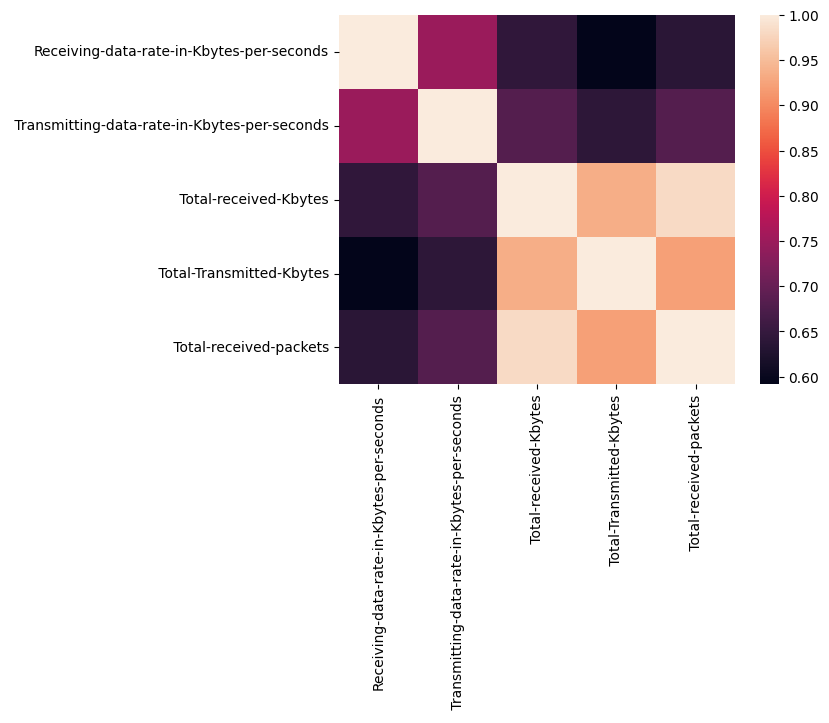

In [5]:
#Heatmap
sn.heatmap(corrMatrix)
plt.show()

−Plot the 2 variables with the most correlation in a scatter plot.

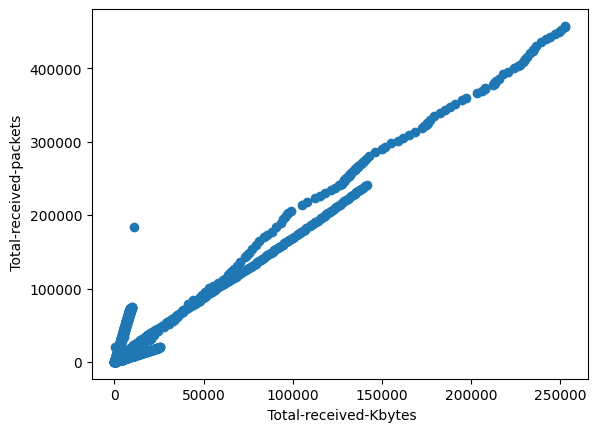

In [6]:
#Scatter plot
plt.scatter(X[' Total-received-Kbytes'], X[' Total-received-packets'])
plt.xlabel(' Total-received-Kbytes')
plt.ylabel(' Total-received-packets')
plt.show()

-Create an array named “y_2c” for two class classification. Convert the samples with the high label as 1 and the rest as 0. 

In [7]:
# Creat one-versus-all with High as 1, all other are labeled 0
y_2c = [1 if val == 'High' else 0 for val in y]

−	Calculate the ratio of high-class samples to all samples. 

In [8]:
#Ratio of high-class 
ratio = sum(y_2c)/len(y_2c)
print(ratio)

0.4444444444444444


-Create an array named “y_mc” that can be used for multiclass classification. Use numerical labels according to the class, as follows: 3-High, 2-Varied, 1-Low, 0-Buffer.

In [9]:
# Create the Multi class y vector
label_map = {'Buffer': 0, 'Low': 1, 'Varied': 2, 'High': 3}
y_mc = [label_map[val] for val in y]

−	Plot the distribution of labels in the data set using a bar plot. 

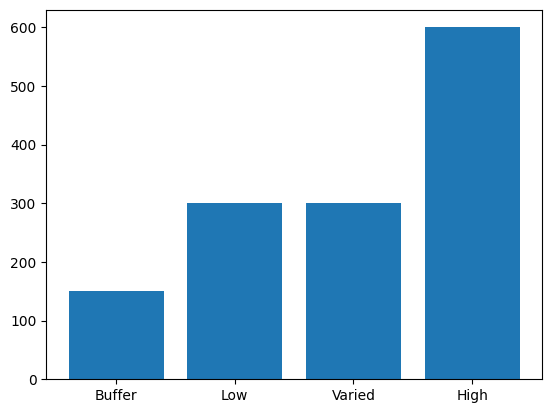

In [10]:
#Plot the distribution of labels.
c_buff = y_mc.count(0)
c_low = y_mc.count(1)
c_var = y_mc.count(2)
c_high = y_mc.count(3)
plt.bar([label for label in label_map], [c_buff, c_low, c_var, c_high])
plt.show()

-Convert data frames X, y_2c, and  y_mc  to NumPy arrays (if they were Pandas objects). Convert the label vector elements to integers using the following notation, y.astype(‘int’), where y is the label vector.  

In [11]:
# Convert to array
y_2c_data = np.array(y_2c)
y_mc_data = np.array(y_mc).astype(int)
X_data = np.array(X)

-Scale the feature matrix X with the StandardScaler() function from Sklearn. 	

In [12]:
#Scaling
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [13]:
c_high = y_mc.count(3)
c_var = y_mc.count(2)
c_low = y_mc.count(1)
c_buff = y_mc.count(0)
tot_count = len(y_mc)
[y_mc.count(val) * 100 / tot_count for val in range(4)]

[11.11111111111111, 22.22222222222222, 22.22222222222222, 44.44444444444444]

**Questions:**
**<br> 1) Which variables have the highest correlation? Does this make sense to you? Why?**

The data that have the highest correlation are *'Total-received-Kbytes'* and *'Total-received-packets'*. Indeed they are representing very similar quantities: they both measure the amount of received data.

**<br> 2) What is the ratio of high-class labels in binary classification?**

The ratio of high_class labels is 0.444

**<br> 3) What is the share of each label in multiclass classification?**
|   Label    |   Share   |
|:----------:|:---------:|
|   Buffer   | 11.1%     |
|   Low      | 22.2%     |
|   Varied   | 22.2%     |
|   High     | 44.4%     |

**<br>4) Why might scaling improve the prediction capability of machine learning?**

Scaling centers the distribution to zero and the standard deviation to one which helps the numerical computation. The scaled features have similar magnitudes.

## Task 2: Binary classification with Logistic Regression

In the second task, you will develop a binary classifier (one versus all) to detect whether the wireless network is operating in high consumption mode or not. ML models will be tested based on 25% of the input data. You are free to develop your own functions using Sklearn functions for tasks like training, predicting, or performance evaluation. 

−	Split the data into training and test sets using the “train_test_split” function from Sklearn. Use 4720 as the random state parameter to control the split. 

In [14]:
#Train test split
Shuffle_state = 4720
X_train_2c, X_test_2c, y_train_2c, y_test_2c = train_test_split(X_scaled, y_2c_data, test_size=.25, random_state=Shuffle_state)

In [15]:
print (sum(y_train_2c), sum(y_test_2c), sum(y_train_2c)/len(y_train_2c), sum(y_test_2c)/len(y_test_2c), len(y_train_2c) - sum(y_train_2c), len(y_test_2c) - sum(y_test_2c) )

441 159 0.4357707509881423 0.47041420118343197 571 179


<br>−Develop and train a logistic regression model with default parameters. 
<br>−Use the trained model to predict test labels. 

In [16]:
#Logistic regression
clf_lr = LogisticRegression().fit(X_train_2c, y_train_2c)
y_prediction = clf_lr.predict(X_test_2c)

−Calculate and print the following performance metrics: Accuracy, recall, precision, and F1 score.

In [17]:
#Performance metrics
def perf_metrics (y_ref, y_pred):
    Accuracy_LR = accuracy_score(y_ref, y_pred)
    F1_LR = f1_score(y_ref, y_pred)
    Precision_LR = precision_score(y_ref, y_pred)
    Recall_LR = recall_score(y_ref, y_pred)
    print("Accuracy: " + str(Accuracy_LR))
    print("F1 score: " + str(F1_LR))
    print("Recall score: " + str(Recall_LR))
    print("Precision score: " + str(Precision_LR))

perf_metrics(y_test_2c, y_prediction)

Accuracy: 0.9319526627218935
F1 score: 0.9220338983050848
Recall score: 0.8553459119496856
Precision score: 1.0


−Plot the receiver operating characteristics (ROC) curve of training and test data in the same figure. By default, the logistic regression model uses a cut-off value of 0.5 to assign a positive or negative prediction to a data point. Different values can be used to bias the prediction towards negative or positive outcomes. The ROC curve plots the combinations of specificity and recall (sensitivity) that result from a range of cut-off values. 

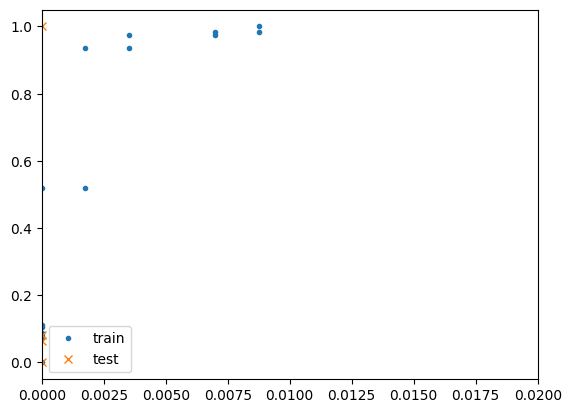

In [18]:
#ROC curve
clf_lr_roc = LogisticRegression().fit(X_train_2c, y_train_2c)
def plot_roc(lr, X_train, y_train, X_test, y_test, x_max=1, verbose=False):
    ax = plt.gca()
    train_disp = lr.predict_proba(X_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_disp[:, 1])
    ax.plot(fpr_train, tpr_train, '.', label="train")
    test_disp = lr.predict_proba(X_test)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_disp[:, 1])
    ax.plot(fpr_test, tpr_test, 'x', label="test")
    ax.set_xlim(0, x_max)
    ax.legend()
    if verbose:
        print(f"fpr_train: {fpr_train}\nftpr_train: {tpr_train}\nthresholds_train: {thresholds_train}")
        print(f"fpr_test: {fpr_train}\nftpr_test: {tpr_train}\nthresholds_test: {thresholds_test}")
    plt.show()

plot_roc(clf_lr_roc, X_train_2c, y_train_2c, X_test_2c, y_test_2c, 0.02)

−Generate and plot the confusion matrix.

[[179   0]
 [ 23 136]]


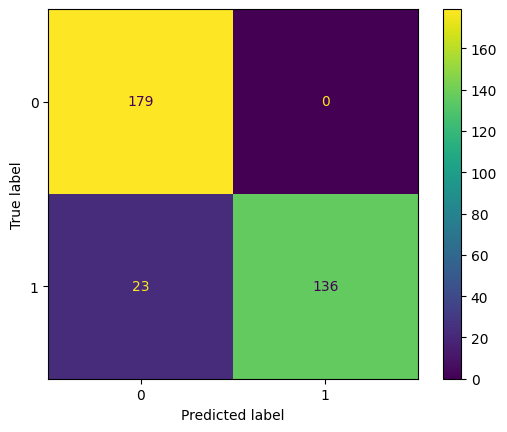

In [19]:
#Confusion Matrix
def show_confusion_matrix(y_test, y_pred):
    cf = confusion_matrix(y_test, y_pred)
    print(cf)
    cf_disp = ConfusionMatrixDisplay(cf)
    cf_disp.plot()
    plt.show()

show_confusion_matrix(y_test_2c, y_prediction)

The class weight parameter adjusts the penalization factor of misclassified examples in model training. Depending on the application selection of weights varies. For example, in medical testing, the cost of false negatives (absence of a disease when it is present) outweighs the cost of false positives (incorrect indication of a disease when it is not present). In this binary classification, we need to modify the weights to reduce the number of missed high cases (false negatives).
<br> -Develop and train a logistic regression model using the “class_weight” parameter to reduce the number of false negatives in the test data (y_(2c_test)=1, but y_pred = 0). (Tip: In CodeLab2, we had constructed a SVM grid search. Similar to that, you don't have to try all the combinations yourself, you can build a nested loop and add a judgment statement at the end until you have a suitable result)
<br> -Print out the selected weights. 


In [20]:
#Weighted logistic regression
weight_0_to_acc = {}
step = 0.001
for weight_0 in np.arange(0.12 , 0.14,  step):
    lr = LogisticRegression(class_weight={0: weight_0, 1: 1-weight_0}).fit(X_train_2c, y_train_2c)
    acc = accuracy_score(y_test_2c, lr.predict(X_test_2c))
    weight_0_to_acc[weight_0] = acc

best_acc = max(weight_0_to_acc.values())
w_0 = max(weight_0_to_acc, key = weight_0_to_acc.get)
w_1 = 1 - w_0
print(f"The best weights are 'w_0': {w_0}, 'w_1': {w_1} with an accuracy of {best_acc:.3f}")

clf_lr_w = LogisticRegression(class_weight={0: w_0, 1: w_1}).fit(X_train_2c, y_train_2c)
y_prediction_w = clf_lr_w.predict(X_test_2c)


The best weights are 'w_0': 0.128, 'w_1': 0.872 with an accuracy of 0.991


−Calculate and print the following performance metrics: Accuracy, recall, precision, and F1 score.

In [21]:
#Performance metrics
perf_metrics(y_test_2c, y_prediction_w)


Accuracy: 0.9911242603550295
F1 score: 0.9904761904761905
Recall score: 0.9811320754716981
Precision score: 1.0


−Plot receiver operating characteristics (ROC) curve of training and test data in the same figure.

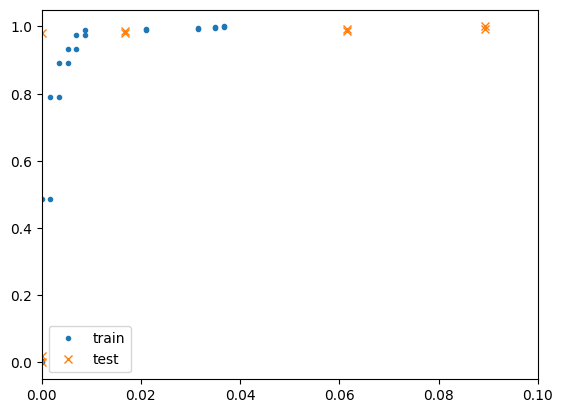

In [22]:
plot_roc(clf_lr_w, X_train_2c, y_train_2c, X_test_2c, y_test_2c, 0.1)

−Generate and plot the confusion matrix.

[[179   0]
 [  3 156]]


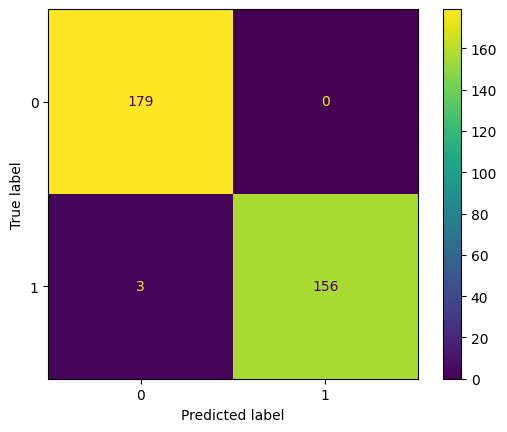

In [23]:
show_confusion_matrix(y_test_2c, y_prediction_w)


<br>Questions :
<br>1) What differences do you find between train and test ROC curves in the logistic regression model?

- The ROC shows best TPR for the test set than for the training set for small values of FPR (and low level for the threshold).
- Nevertheless, the performances of the classifier seems to be execellent as the ROC curve shows the TPR is very close to 1 for small values of the FPR.
- The ROC reveals slightly poorer performances on the classifier with tuned weights for low value of the threshold.

<br>2) What does the confusion matrix represent?

For a binary classifier, the confusion matrix represents the following information

|                     | predicted Negative | predicted Positive
|:-------------------:|:------------------:|:------------------:|
|**actually Negative**| True Negative      | False Positive     |
|**actually Positive**| False Negative     | True Positive      |


<br>3) How do the weights influence the results of our classification in logistic regression?

With a weight that is fitted to get better accuracy on the test set, it is possible to reduce the False Negative from 23 to 3 while keeping the False Positive at 0.

<br>4) What metrics are good to use to compare models? How can you decide what is a good model?

| Metric          | Default Weights  | Tuned Weights    |
|-----------------|------------------|------------------|
| Accuracy        | 0.9319           | 0.9911           |
| F1 Score        | 0.9220           | 0.9905           |
| Recall Score    | 0.8553           | 0.9811           |
| Precision Score | 1.0000           | 1.0000           |

The 3 first considered metrics seems agree on the fact that the tuned-weights model is better than the default wieghts one.

In the present case, the precision score is not disciminating as there is no false positive.


## Task 3: Binary classification with SVM

In this task you will develop multiple support vector classifiers (SVC) for the binary classification task. 
<br> -Develop and train a linear SVC with the given parameters [C=1.0, coef0=0.0, tol=1e-3]. (Note: default kernel is RBF and must be changed to linear)

In [24]:
clf_svmlin = svm.SVC(kernel="linear", C=1.0, coef0=0.0, tol=1e-3).fit(X_train_2c, y_train_2c)
y_prediction_svmlin = clf_svmlin.predict(X_test_2c)


−Calculate and print the following performance metrics: Accuracy, recall, precision, and F1 score.

In [25]:
#Performance metrics
perf_metrics(y_test_2c, y_prediction_svmlin)

Accuracy: 0.9556213017751479
F1 score: 0.9504950495049505
Recall score: 0.9056603773584906
Precision score: 1.0


−Plot receiver operating characteristics (ROC) curve of training and test data in the same figure.

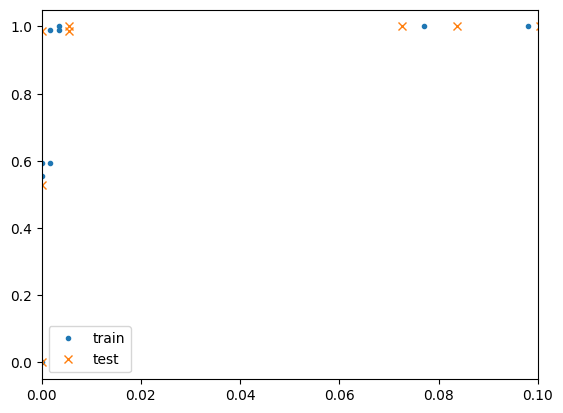

In [26]:
clf_svmlin_proba = svm.SVC(kernel="linear", C=1.0, coef0=0.0, tol=1e-3, probability=True).fit(X_train_2c, y_train_2c)

plot_roc(clf_svmlin_proba, X_train_2c, y_train_2c, X_test_2c, y_test_2c, 0.1)

−Generate and plot the confusion matrix.

[[179   0]
 [ 15 144]]


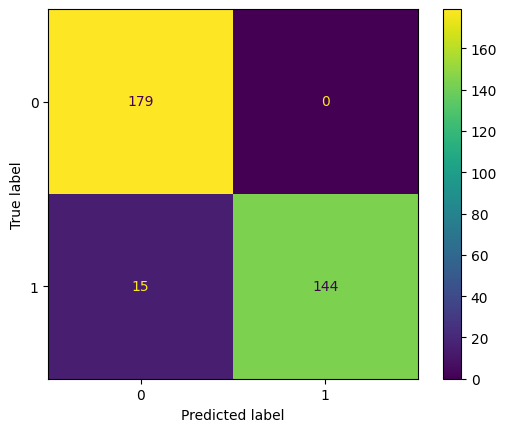

In [27]:
show_confusion_matrix(y_test_2c, y_prediction_svmlin)

Next step, you will investigate the impact of hyperparameters. The regularization parameter (C) adjusts the penalty factor for samples in training.
<br>-Develop two linear SVCs, one with parameter C as 0.0001 and one with C as 100, then train both models. (tol=1e-3)


In [28]:
#SVC construction for C=0.0001 and C=100
C_val = 0.0001
clf_svmlin2 = svm.SVC(kernel="linear", C=C_val, coef0=0.0, tol=1e-3).fit(X_train_2c, y_train_2c)
clf_svmlin2_proba = svm.SVC(kernel="linear", C=C_val, coef0=0.0, tol=1e-3, probability=True).fit(X_train_2c, y_train_2c)
y_prediction_svmlin2 = clf_svmlin2.predict(X_test_2c)

C_val = 100
clf_svmlin3 = svm.SVC(kernel="linear", C=C_val, coef0=0.0, tol=1e-3).fit(X_train_2c, y_train_2c)
clf_svmlin3_proba = svm.SVC(kernel="linear", C=C_val, coef0=0.0, tol=1e-3, probability=True).fit(X_train_2c, y_train_2c)
y_prediction_svmlin3 = clf_svmlin3.predict(X_test_2c)

−Calculate and print the following performance metrics for both cases: Accuracy, recall, precision, and F1 score.

In [29]:
#Performance metrics C=0.0001
perf_metrics(y_test_2c, y_prediction_svmlin2)

Accuracy: 0.5355029585798816
F1 score: 0.02484472049689441
Recall score: 0.012578616352201259
Precision score: 1.0


In [30]:
#Performance metrics C=100
perf_metrics(y_test_2c, y_prediction_svmlin3)

Accuracy: 0.9792899408284024
F1 score: 0.9776357827476039
Recall score: 0.9622641509433962
Precision score: 0.9935064935064936


−	Plot the receiver operating characteristic (ROC) curves for both cases separately.

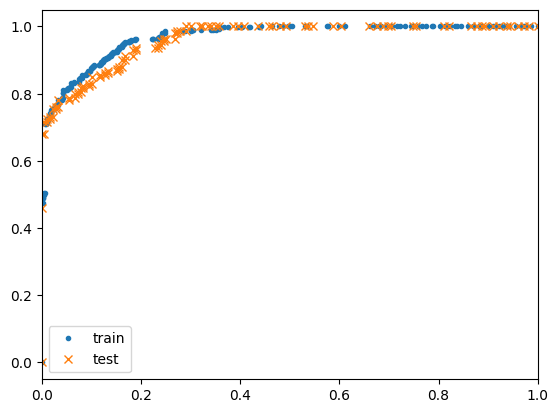

In [31]:
#ROC curve for C=0.0001
plot_roc(clf_svmlin2_proba, X_train_2c, y_train_2c, X_test_2c, y_test_2c, 1)

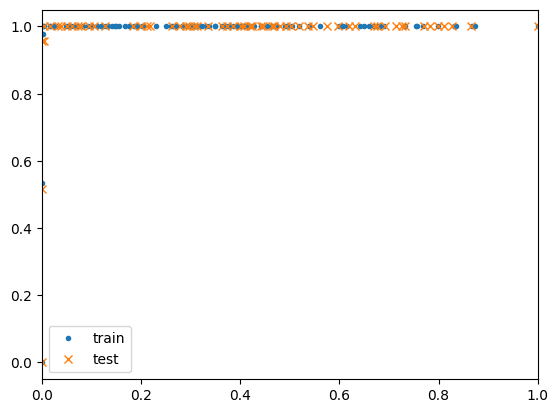

In [32]:
#ROC curve for C=0.0001
plot_roc(clf_svmlin3_proba, X_train_2c, y_train_2c, X_test_2c, y_test_2c, 1)

−	Generate and plot the confusion matrices for both cases separately.

[[179   0]
 [157   2]]


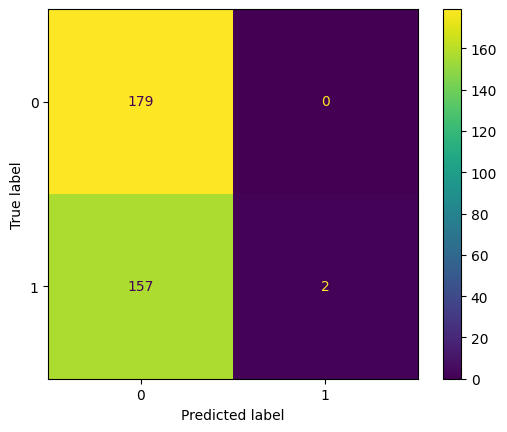

In [33]:
#Confusion matrix C=0.0001
show_confusion_matrix(y_test_2c, y_prediction_svmlin2)

[[178   1]
 [  6 153]]


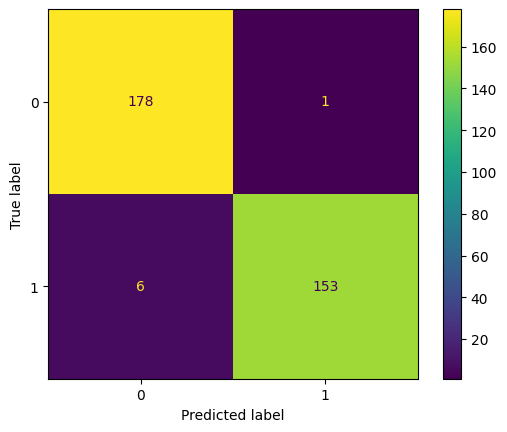

In [34]:
#Confusion matrix C=100
show_confusion_matrix(y_test_2c, y_prediction_svmlin3)

The other tunable hyperparameter is tolerance which adjusts the stopping criteria of the optimizer. 
<br>−	Develop and train a linear SVC with the given parameters [C=1.0, coef0=0.0, tol=10]. 


In [35]:
#Tolerance 10
clf_svmlin4 = svm.SVC(kernel="linear", C=1.0, coef0=0.0, tol=10).fit(X_train_2c, y_train_2c)
clf_svmlin4_proba = svm.SVC(kernel="linear", C=1.0, coef0=0.0, tol=10, probability=True).fit(X_train_2c, y_train_2c)
y_prediction_svmlin4 = clf_svmlin4.predict(X_test_2c)

In [36]:
#Performance metrics tolerance 10
perf_metrics(y_test_2c, y_prediction_svmlin4)

Accuracy: 0.47041420118343197
F1 score: 0.6398390342052314
Recall score: 1.0
Precision score: 0.47041420118343197


−Plot receiver operating characteristics (ROC) curve of training and test data in the same figure.

fpr_train: [0. 1.]
ftpr_train: [0. 1.]
thresholds_train: [      inf 0.4358863]
fpr_test: [0. 1.]
ftpr_test: [0. 1.]
thresholds_test: [      inf 0.4358863]


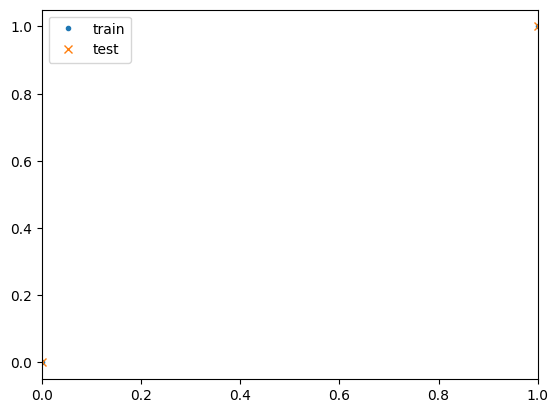

In [37]:
#ROC curve for tolerance 10
plot_roc(clf_svmlin4_proba, X_train_2c, y_train_2c, X_test_2c, y_test_2c, 1, True)


−Generate and plot the confusion matrix.

[[  0 179]
 [  0 159]]


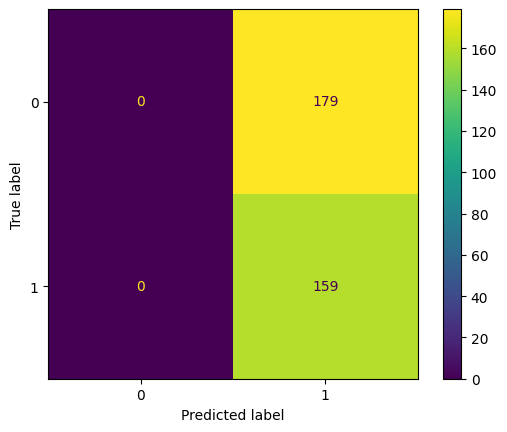

In [38]:
#Confusion matrix tolerance 10
show_confusion_matrix(y_test_2c, y_prediction_svmlin4)

Kernels are decision functions applied to transform the feature space into higher dimensions. Nonlinear relationships between features can be found in high-dimensional space. In this CodeLab you will use a polynomial SVC (SVM classifier with a polynomial kernel). 
<br> −Develop and train two polynomial SVCs [kernel=’poly’] one with the degree of 3 and one with the degree of 2.  [C=1.0, coef0=0.0, tol=1e-3]. 

In [39]:
#Polynomial SVM with 2nd and 3rd degree. 
clf_svmpoly3 = svm.SVC(kernel="poly", degree=3, C=1., coef0=0., tol=1e-3).fit(X_train_2c, y_train_2c)
y_prediction_svmpoly3 = clf_svmpoly3.predict(X_test_2c)

clf_svmpoly2 = svm.SVC(kernel="poly", degree=2, C=1., coef0=0., tol=1e-3).fit(X_train_2c, y_train_2c)
y_prediction_svmpoly2 = clf_svmpoly2.predict(X_test_2c)


−Calculate and print the following performance metrics for both cases: Accuracy, recall, precision, and F1 score.

In [40]:
#Performance metrics polynomial 3rd 
perf_metrics(y_test_2c, y_prediction_svmpoly3)

Accuracy: 0.8106508875739645
F1 score: 0.748031496062992
Recall score: 0.5974842767295597
Precision score: 1.0


In [41]:
#Performance metrics polynomial 2nd
perf_metrics(y_test_2c, y_prediction_svmpoly2)

Accuracy: 0.7248520710059172
F1 score: 0.5866666666666668
Recall score: 0.41509433962264153
Precision score: 1.0


−	Generate and plot the confusion matrices for both cases separately.

[[179   0]
 [ 64  95]]


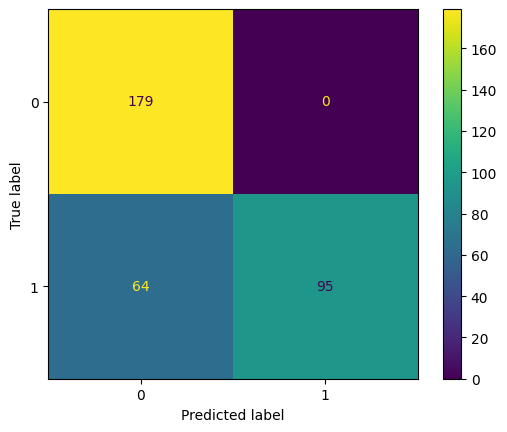

In [42]:
#Confusion matrix poly 3rd
show_confusion_matrix(y_test_2c, y_prediction_svmpoly3)

[[179   0]
 [ 93  66]]


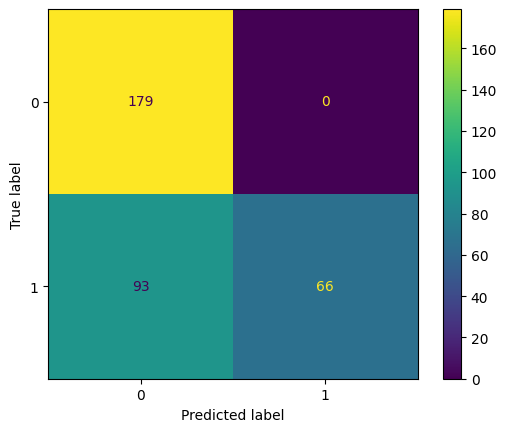

In [43]:
#Confusion matrix poly 2nd
show_confusion_matrix(y_test_2c, y_prediction_svmpoly2)

Synthesis
| Metric          | Default Weights  | Tuned Weights    | SVM lin 1           | SVM lin 2           | SVM lin 3           | SVM lin 4           | SVM poly 3      | SVM poly 2      |
|-----------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|
| Accuracy        | 0.9319           | 0.9911           | 0.9556           | 0.5355           | 0.9793           | 0.4704           | 0.8107           | 0.7249           |
| F1 Score        | 0.9220           | 0.9905           | 0.9505           | 0.0248           | 0.9776           | 0.6398           | 0.7480           | 0.5867           |
| Recall Score    | 0.8553           | 0.9811           | 0.9057           | 0.0126           | 0.9623           | 1.0000           | 0.5975           | 0.4151           |
| Precision Score | 1.0000           | 1.0000           | 1.0000           | 1.0000           | 0.9935           | 0.4704           | 1.0000           | 1.0000           |
| C               |                  |                  | 1.0              | 0.0001           | 100              | 1.0              | 1.0              | 1.0              |
| tol             |                  |                  | 1e-3             | 1e-3             | 1e-3             | 10               | 1e-3             | 1e-3             |
| degree          |                  |                  |                  |                  |                  |                  | 3                | 2                |


**Questions** 
**<br> 1) Compare linear SVM and logistic regression models.**

The best logistic regression model is the Tuned weights one. The best linear SVN model is the 3rd one with C=100 and tol=1e-3.

The performance indicators are all better for the Tuned Weights regression model than the linear SVM 3.

**<br> 2) What did you observe when parameter C is varied? Explain the role of parameter C in SVC.**

The greater C (keeping tol=1e-3), the better the metrics are, except for the precision score that does not reach 1 for C = 100.

It is a multiplier of the distance from the correct margin for misclassified samples in the cost function. The other term of the cost function is 1/2 square sum of the linear coefficient, therefore C also acts as the inverse of the regularization coefficient. The greater is C, the greater is the penalty, but also the greater are the linear coefficients, which tends the classifier to overfit.

**<br> 3) What did you observe when tolerance is changed to 10? Explain the role of parameter tolerance in SVC.**

When the tolerance is set to 10, the model is far less relevant. This parameter is used to tune the optimization algorithm termination tolerance.

**<br> 4) Which SVM model do you prefer for this problem, polynomial or linear kernel?  Why? What is the potential benefit of using a nonlinear kernel?**

In that case the linear models outperforms the polynomial kernels. This means that we should not rush to use nonlinear kernel that are more prone to overfitting. However, to capture more complex separations, polynomial - and more generally nonlinear - kernels are more adapted. 

**<br> 5) Rank the models from the highest performance to the lowest one with F1 scores.**

| Model           | F1 Score  |
|-----------------|-----------|
| Tuned Weights   | 0.9905    |
| Default Weights | 0.9905    |
| SVM 3           | 0.9776    |
| SVM 1           | 0.9505    |
| SVM poly 3      | 0.7480    |
| SVM 4           | 0.6398    |
| SVM 2           | 0.5867    |
| SVM poly 2      | 0.0248    |

## Task 4: Multi-class classification

Multi-class classification predicts the best among a set of labels (four, in this case). We consider two different model classes (logistic regression and SVM) and within the logistic regression model, both the One vs. All and the multi-class approach. 
<br> The One vs. All (called ‘one versus rest’ in sklearn) method constructs binary classifiers for each class. The final prediction is based on the model with the highest score or the largest (signed) distance from the classification boundary. 

<br>-Split the data (X, and y_mc) into training (75%) and test sets (25%) using the “train_test_split” function from Sklearn. Use 4720 as the random state parameter to control the split.  

In [44]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X_scaled, y_mc_data, test_size=.25, random_state=4720)

-Develop and train a logistic regression model using the one vs. rest (parameter multi_class=’ovr’) method using the “y_mc” label vector. 

In [45]:
clf_lr_ovr = LogisticRegression(multi_class='ovr').fit(X_train_mc, y_train_mc)
y_prediction_lrovr = clf_lr_ovr.predict(X_test_mc)

−	Calculate and print the accuracy of the model. 

In [46]:
#Accuracy of OVR LR
Accuracy_lrovr = accuracy_score(y_test_mc, y_prediction_lrovr)
print("Accuracy: " + str(Accuracy_lrovr))

Accuracy: 0.8461538461538461


−Generate and plot the confusion matrix.

[[ 14  18   3   0]
 [  0  57  14   0]
 [  0   2  71   0]
 [  0   0  15 144]]


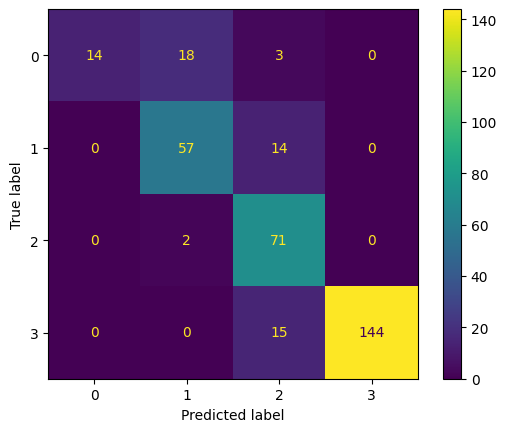

In [47]:
#Confusion matrix OVR LR
show_confusion_matrix(y_test_mc, y_prediction_lrovr)

For logistic regression, we can also directly train a multi-class classifier using the multi-class cross-entropy loss (sklearn calls this the multinomial cross-entropy loss).  
<br>−Develop and train a multi-class logistic regression model (parameter multi_class=’multinomial’)


In [48]:
clf_lr_mult = LogisticRegression(multi_class='multinomial').fit(X_train_mc, y_train_mc)
y_prediction_lrmult = clf_lr_mult.predict(X_test_mc)

−	Calculate and print the accuracy of the model. 

In [49]:
#Accuracy of Mult LR
Accuracy_lrmult = accuracy_score(y_test_mc, y_prediction_lrmult)
print("Accuracy: " + str(Accuracy_lrmult))

Accuracy: 0.9053254437869822


−Generate and plot the confusion matrix.

[[ 21  14   0   0]
 [  0  70   1   0]
 [  0   2  71   0]
 [  0   0  15 144]]


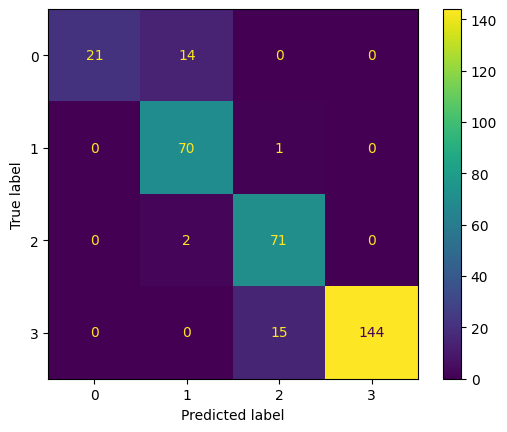

In [50]:
#Confusion matrix mult LR
show_confusion_matrix(y_test_mc, y_prediction_lrmult)

SVM can be used in multi-class classification tasks as well, but it will rely on the one-versus-all approach (or, for non-linear kernels, on the related one-versus-one approach). 

<br> - Develop and train a linear SVC [kernel=’linear’] as a one vs. all classifier with the given parameters [C=1.0, coef0=0.0, tol=1e-3]. 

In [51]:
#OVR SVM
clf_svmlin_mc_ovr = svm.SVC(kernel="linear", decision_function_shape='ovr', C=1., coef0=0.0, tol= 1e-3).fit(X_train_mc, y_train_mc)
y_prediction_svmovr = clf_svmlin_mc_ovr.predict(X_test_mc)

−	Calculate and print the accuracy of the model. 

In [52]:
#Accuracy of SVM
Accuracy_svmovr = accuracy_score(y_test_mc, y_prediction_svmovr)
print("Accuracy: " + str(Accuracy_svmovr))

Accuracy: 0.9437869822485208


−Generate and plot the confusion matrix.

[[ 30   5   0   0]
 [  0  70   1   0]
 [  2   0  71   0]
 [  0   0  11 148]]


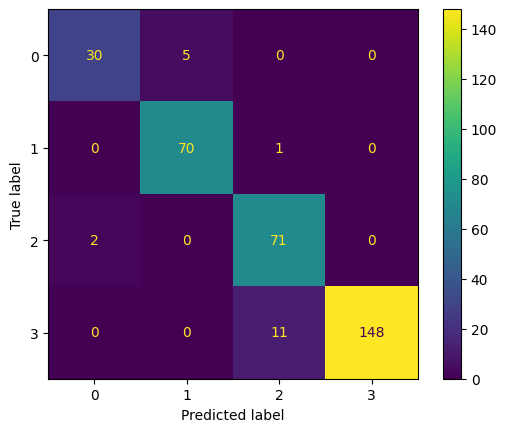

In [53]:
#Confusion matrix SVM OVR
show_confusion_matrix(y_test_mc, y_prediction_svmovr)

| Model                            | Accuracy            |
|----------------------------------|---------------------|
| Logistic Regression (ovr)        | 0.8461538461538461  |
| Logistic Regression (multinomial)| 0.9053254437869822  |
| Linear SVM                       | 0.9437869822485208  |


**Questions:**
**<br>1) How does the performance change for both classification methods for the logistic regression and why?**

The multinomial logistic regression has better performance compare to the one-vs-all logistic regression. By definition:
- The multinomial one focuses on establishing the borders between classes.
- The one-vs-all only establishes sequentially borders between one class and the rest. The final classification is then chosen by comparing the probability of belonging from one class or the other.

The one-vs-all is by design indirect and therefore less precise compare to the multinomial regression.

**<br>2) Which classification method is more computationally demanding and why?**

Literature says that the one vs all is less computationally demanding than the multinomial. Probably, the complexity of the multinomial approach as well as the fact that there are a bigger set of coefficients to be optimized at once is more demanding than having to reiterate nb_class * a simpler model.

**<br>3) Why other classification metrics cannot be used directly in multi-class classification tasks?**

The other metrics are designed to evaluate binary classifier and are based on Positive/Negative dichotomy which has no meaning for multi-class classification tasks.

**<br>4) Why can multi-class classification be directly applied to logistic regression but not SVM?**

The formulation from binary to multi-class cost function to be optimized is pretty natural for logistic regression while it is not the case for the SVM one and would probably ends-up with high complexity.

**<br>5) Compare all three models’ performance in multi-class classification.**

In term of performances: 
Linear SVM > Multinomial Logistic Regression > Logistic Regression One-vs-all

**<br>6) Which classes have higher mismatches in logistic regression?**

The class 0 which corresponds to the 'buffer' label has the highest mismatch. Note that this is the class that is the less represented in the data.

**<br>7) Which classes have higher mismatches in SVM?**
idem

### Bonus Task

Conduct a multi-class classification using only binary classifiers. You can use either logistic regression or SVM. Describe the steps you follow and how it works. Calculate each classifier’s output probabilities for the test data and plot them in ascending order.  